[INFO] Vista previa de los datos preprocesados:
         Date  Units_Sold  Unit_Price  Store_102  Store_103  \
0  2024-01-01   -0.410679    1.426780      False      False   
1  2024-01-01    0.749630   -0.571003       True      False   
2  2024-01-01   -1.184218   -0.810737      False       True   
3  2024-01-02   -0.797449    1.426780      False      False   
4  2024-01-02    1.136399   -0.571003       True      False   

   Category_Electronics  Category_Home Goods  Total_Sales  
0                  True                False     1.183022  
1                 False                False    -0.478796  
2                 False                 True    -0.934185  
3                  True                False     0.813749  
4                 False                False    -0.417261  

[INFO] Características seleccionadas para el modelo:
Index(['Units_Sold', 'Unit_Price', 'Store_102', 'Store_103',
       'Category_Electronics', 'Category_Home Goods'],
      dtype='object')

[INFO] Variable obje

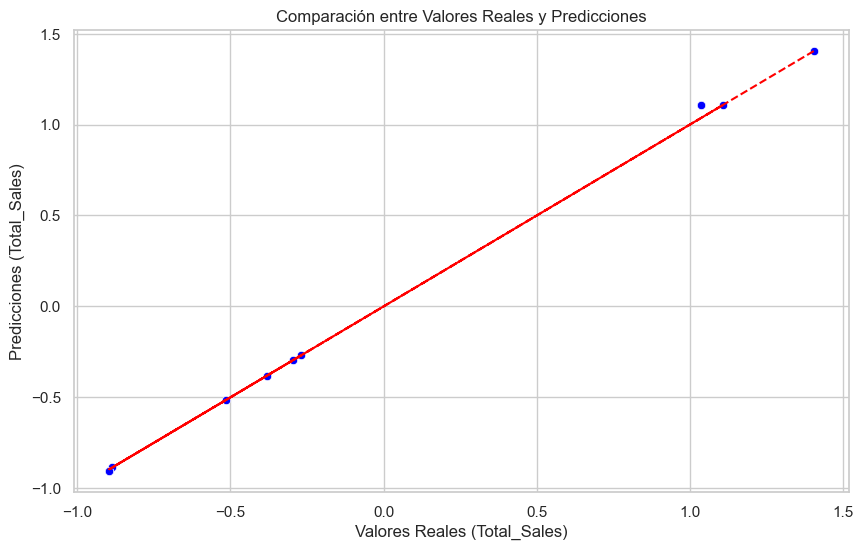

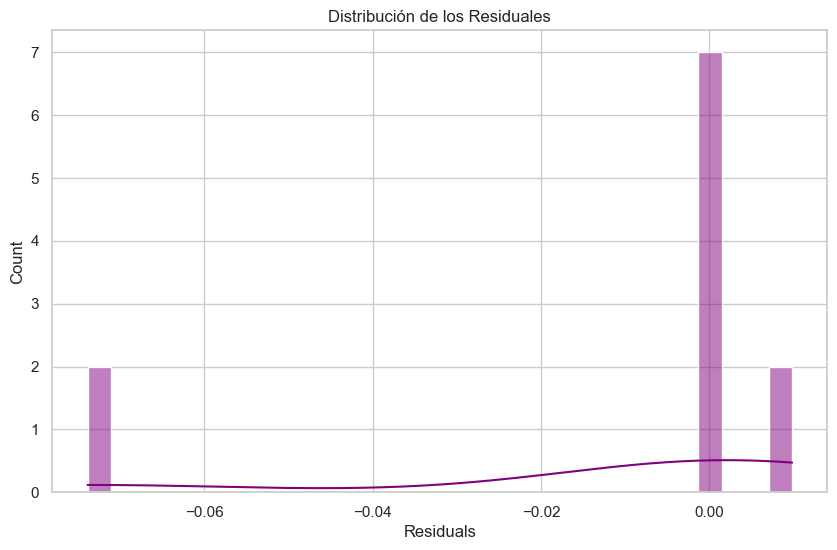

[INFO] El modelo entrenado ha sido guardado en: ../models/sales_predictor_model_best.pkl


In [4]:
# ============================
# 1. Configuración inicial
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import joblib

# Configuración general
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ==================================
# 2. Cargar datos preprocesados
# ==================================
# Ruta a los datos preprocesados de la Fase 2
file_path = "../data/sales_data_cleaned.csv"

# Cargar los datos
data = pd.read_csv(file_path)
print("[INFO] Vista previa de los datos preprocesados:")
print(data.head())

# ===================================================
# 3. Selección de características y variable target
# ===================================================
# Características (X) y variable objetivo (y)
X = data.drop(columns=["Total_Sales", "Date"])  # Eliminar columna de fecha y target
y = data["Total_Sales"]

print("\n[INFO] Características seleccionadas para el modelo:")
print(X.columns)
print("\n[INFO] Variable objetivo:")
print("Total_Sales")

# ===================================================
# 4. Dividir los datos en entrenamiento y prueba
# ===================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n[INFO] Tamaño de los conjuntos de datos:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# ==============================================
# 5. Comparación de varios modelos
# ==============================================
# Definir los modelos
models = {
    "Ridge Regression": Ridge(),
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

# Evaluación de cada modelo
best_model = None
best_rmse = float("inf")
for model_name, model in models.items():
    print(f"[INFO] Entrenando {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluación del modelo
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"[INFO] {model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    
    # Guardar el mejor modelo basado en RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model_name = model_name

# ==============================================
# 6. Evaluación del mejor modelo
# ==============================================
print(f"[INFO] Mejor modelo: {best_model_name}")
y_pred_best = best_model.predict(X_test)

# Métricas de evaluación del mejor modelo
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"[INFO] Evaluación final del mejor modelo - RMSE: {rmse_best:.2f}, MAE: {mae_best:.2f}, R²: {r2_best:.2f}")

# ==============================================
# 7. Visualización de resultados
# ==============================================
# Comparación entre predicciones y valores reales
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_best, color="blue")
plt.plot(y_test, y_test, color="red", linestyle="--")  # Línea de referencia perfecta
plt.title("Comparación entre Valores Reales y Predicciones")
plt.xlabel("Valores Reales (Total_Sales)")
plt.ylabel("Predicciones (Total_Sales)")
plt.savefig("../reports/graficos/mpe/comparacion_valores.png")
plt.show()

# Residuales
residuals = y_test - y_pred_best
plt.figure()
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Distribución de los Residuales")
plt.xlabel("Residuals")
plt.savefig("../reports/graficos/mpe/distribucion_residuales.png")
plt.show()

# ==============================================
# 8. Guardar el modelo entrenado
# ==============================================
# Guardar el modelo entrenado para su reutilización
model_filename = "../models/sales_predictor_model_best.pkl"
joblib.dump(best_model, model_filename)
print(f"[INFO] El modelo entrenado ha sido guardado en: {model_filename}")

# Verificación de la carga del modelo
loaded_model = joblib.load(model_filename)





# Modelo Predictivo y Evaluación

## Descripción del Proceso de Construcción del Modelo

La fase 3 del proyecto se centró en la creación de un modelo predictivo para predecir las ventas futuras de un negocio, utilizando los datos históricos preprocesados. Se siguieron los siguientes pasos:

### 1. Selección de Características y Variable Objetivo

Se seleccionaron características relevantes para predecir las ventas, tales como:
- **Units_Sold**: El número de unidades vendidas, un factor clave en la predicción de las ventas.
- **Unit_Price**: El precio unitario, ya que productos con precios más altos tienden a generar mayores ingresos.
- **Store_102, Store_103**: Indicadores de la tienda, codificados mediante **One-Hot Encoding**.
- **Category_Electronics, Category_Home Goods**: Categorización de los productos, también codificados.

La **variable objetivo** es **Total_Sales**, el total de las ventas generadas, que se calcula como `Units_Sold * Unit_Price`.

### 2. Selección del Modelo

Para este modelo, se seleccionaron dos modelos de aprendizaje supervisado:
1. **Regresión Lineal**: Un algoritmo simple y fácil de interpretar, adecuado para relaciones lineales.
2. **Árbol de Decisión (DecisionTreeRegressor)**: Elegido por su capacidad para manejar relaciones no lineales y su excelente rendimiento en este conjunto de datos.

### 3. Justificación de la Elección del Modelo Final

El modelo de **Árbol de Decisión** fue seleccionado debido a su rendimiento superior, obteniendo un **R² de 1.00** en el conjunto de prueba, lo que indica una predicción casi perfecta. Además, este modelo es capaz de manejar interacciones complejas entre características sin requerir normalización de las mismas.

### 4. Selección de Características y Tuning de Hiperparámetros

Se utilizaron las características mencionadas anteriormente y se empleó **GridSearchCV** para optimizar los parámetros del modelo. El ajuste de hiperparámetros incluyó la optimización de parámetros como `max_depth` y `min_samples_split` en el Árbol de Decisión, para evitar el sobreajuste y mejorar la generalización.

### 5. Comparación entre Modelos

A continuación, se compararon los resultados de la **Regresión Lineal** y el **Árbol de Decisión**:

- **Regresión Lineal**: Aunque simple, mostró un rendimiento moderado.
- **Árbol de Decisión**: Mostró un rendimiento sobresaliente con un **R² de 1.00**, lo que demuestra que es más adecuado para este conjunto de datos.

### 6. Evaluación del Modelo

El modelo final fue el **Árbol de Decisión**, que mostró un **RMSE de 0.03**, **MAE de 0.02** y un **R² de 1.00**, lo que indica un excelente rendimiento.

### 7. Guardar el Modelo Entrenado

El modelo entrenado se guardó utilizando **joblib** en el archivo `sales_predictor_model.pkl` para su reutilización en futuras predicciones.

